<a href="https://colab.research.google.com/github/yesimcebeci/Twitter-Sentiment-Analysis-on-Airlines/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter Sentiment Analysis

- Student name: Yesim Cebeci
- Student pace: self paced
- Scheduled project review date/time: 
- Instructor name: Morgan Jones

## Overview

Sentiment Analysis is a type of data mining that measures the sentiment of a given text corpus, such as customer reviews or public opinion polls. It uses Natural Language Processing (NLP) algorithms to detect the sentiment of a text and assign it a polarity score, ranging from negative to positive. The polarity score helps an analyst understand which words, phrases, and topics have an impact on the sentiment of the overall text. With this information, an analyst can better understand the opinions and feelings of their readers, and target their communication strategies accordingly.

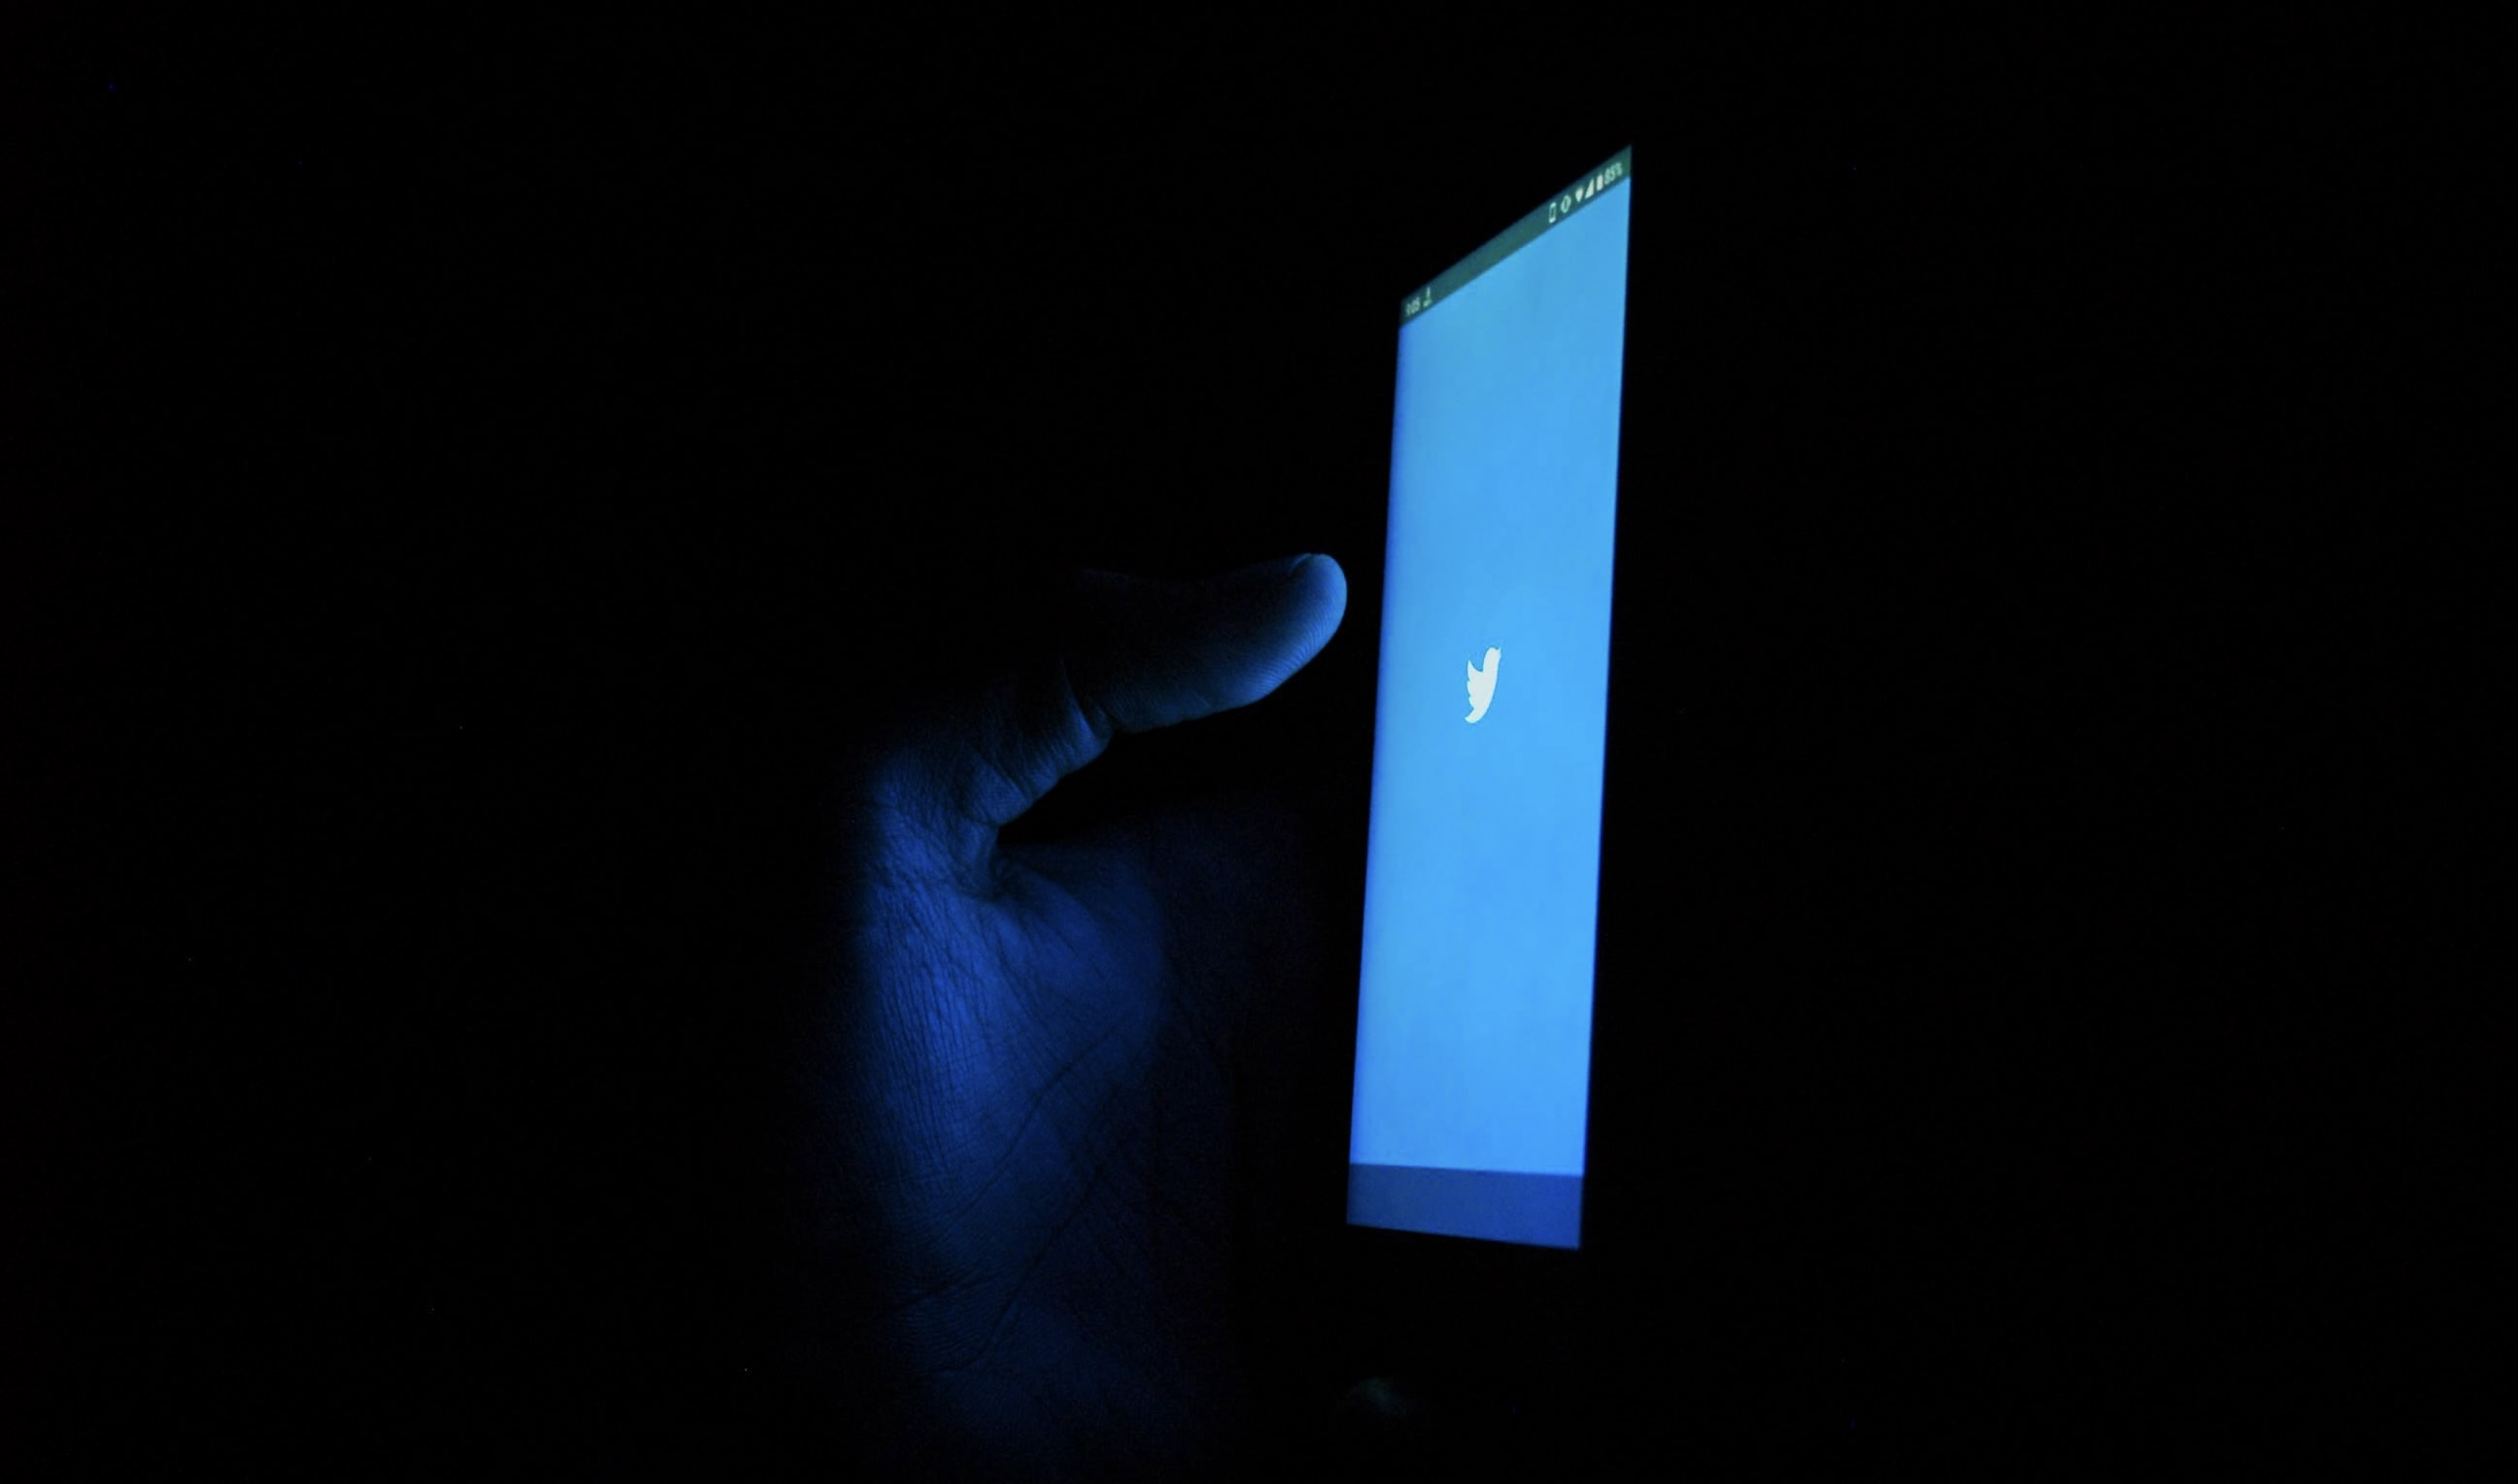

## Business Understanding 

Airline companies  wants to use model to identify customers that are having a negative experience and direct tweets with negative sentiment towards the proper channel.

One way this might be accomplished would be to set up a bot that uses sentiment analysis to automatically identify tweets with negative sentiment, and then direct those tweets to the appropriate customer service representative or department for further assistance. This could include offering customers discounts or refunds, or providing additional support or information to help resolve any issues they may be experiencing.

By implementing this system, the airline company can improve customer satisfaction by addressing negative experiences more quickly and efficiently, increase brand loyalty by showing that they value and take action on customer feedback.

## Data Understanding

The dataset used in this project is provided on [Kaggle](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment) and originally collected by Crowdflower’s Data for Everyone library. 

This Twitter data was scraped on **February 2015**. It contains tweets on six major United States (US) airlines: **United, Us Airways, American, Soutwest, Delta and Virgin America**. 

Dataset has **14,640** entries and **15** columns. 

We have three different target categories as positive, neutral or negative depend on tweet. 

## Importing Libraries

In [1]:
# importing necessary libraries for EDA and Cleaning
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

# Plotting pretty figures and avoid blurry images
%config InlineBackend.figure_format = 'retina'
# Larger scale for plots in notebooks
sns.set_context('notebook')

## Loading Dataset 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Sentiment Analysis/Tweets.csv"
df = pd.read_csv(path)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


##  Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
#Check for missing values
100*df.isna().sum()/len(df)

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

As we can see there is a lot of null values.
I will be mainly focusing on the following columns: 

 **“airline”**: Name of the airline company 

 **“airline_sentiment”**: A categorical feature contains labels for tweets, positive, negative or neutral. 

 **“negativereason”**: Categorical feature which represents the reason behind considering this tweet as negative. 

 **“text”**: Original tweet posted by the user. 

In [6]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [7]:
df['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [8]:
df['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

In [9]:
df['negativereason_gold'].value_counts()

Customer Service Issue                      12
Late Flight                                  4
Can't Tell                                   3
Cancelled Flight                             3
Cancelled Flight\nCustomer Service Issue     2
Late Flight\nFlight Attendant Complaints     1
Late Flight\nLost Luggage                    1
Bad Flight                                   1
Lost Luggage\nDamaged Luggage                1
Late Flight\nCancelled Flight                1
Flight Attendant Complaints                  1
Customer Service Issue\nLost Luggage         1
Customer Service Issue\nCan't Tell           1
Name: negativereason_gold, dtype: int64

In [10]:
df['airline_sentiment_gold'].value_counts()

negative    32
positive     5
neutral      3
Name: airline_sentiment_gold, dtype: int64

In [11]:
df['retweet_count'].value_counts()

0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
28        1
9         1
18        1
11        1
31        1
15        1
44        1
Name: retweet_count, dtype: int64

In [12]:
df['tweet_coord'].value_counts()

[0.0, 0.0]                      164
[40.64656067, -73.78334045]       6
[32.91792297, -97.00367737]       3
[40.64646912, -73.79133606]       3
[35.22643463, -80.93879965]       2
                               ... 
[40.69429232, -74.17208436]       1
[37.61833841, -122.38389799]      1
[37.61859126, -122.38385699]      1
[45.58931882, -122.5959928]       1
[40.64946781, -73.76624703]       1
Name: tweet_coord, Length: 832, dtype: int64

- According to percentage of null values in dataset, there are three columns that are not very useful, 
 **negativereason_gold (%99,7)** , 
 **airline_sentiment_gold (%99,7)** , **tweet_coord(%93)**
- Eventhough **'retweet_count'** doesnt have any null values ,13873 rows out of 14640 rows have a value 0.
- Therefore, we can remove these columns in order to keep our dataset clean, so we can develop our analysis more clearly based on the information given.
- I have also dropped **tweet_location**, **tweet_created**,**user_timezone** and name as these pieces of data will not contribute to our analysis.

- According to my Exploratory Data Analysis,
I will be mainly focusing on the following columns: 

 **“airline”**: Name of the airline company 

 **“text”**: Original tweet posted by the user.

 **“airline_sentiment”**: A categorical feature contains labels for tweets, positive, negative or neutral. 



## Data Visualization

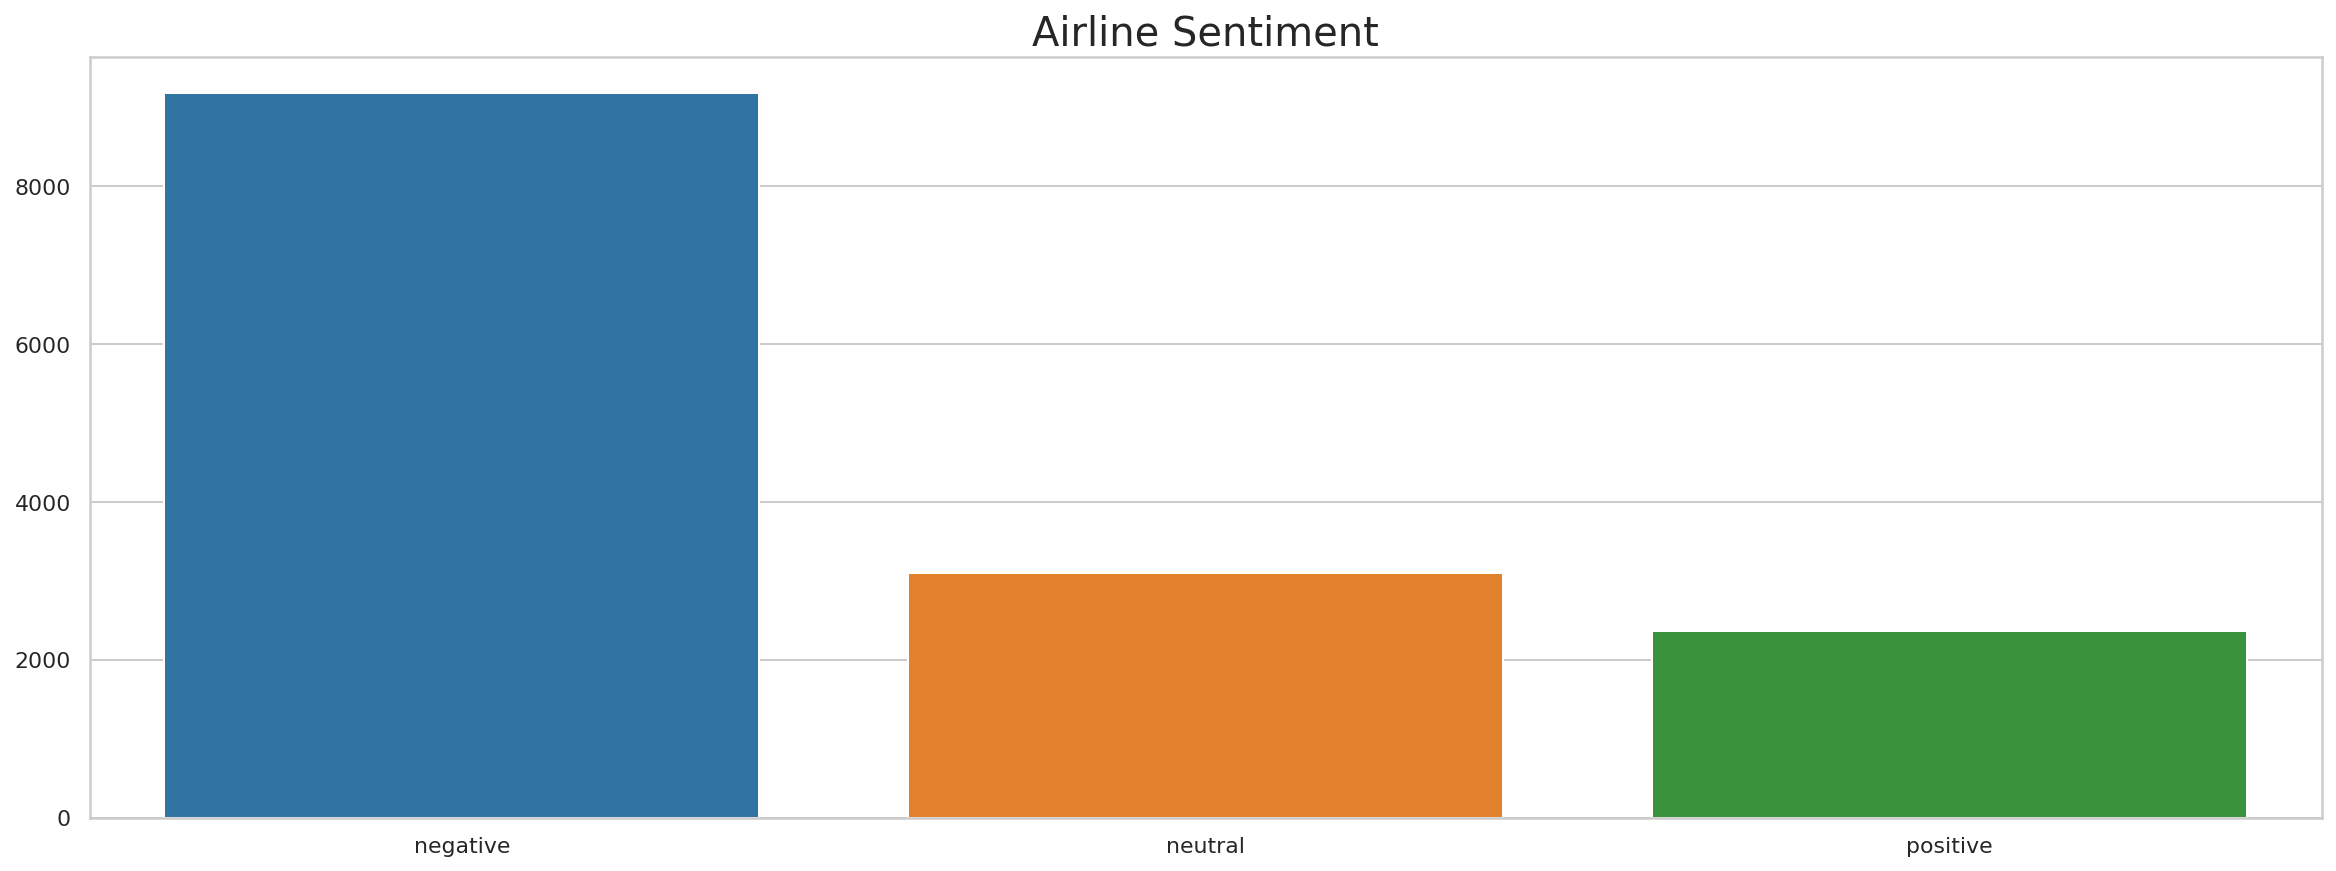

In [13]:
plt.figure(figsize=(20,7));
sns.countplot(x= df.airline_sentiment, order = df.airline_sentiment.value_counts().index);
plt.xlabel('');
plt.ylabel('');
plt.title('Airline Sentiment',fontsize = 20);
plt.show()

- Here, we can clearly see that these tweets are overwhelmingly **negative**. 

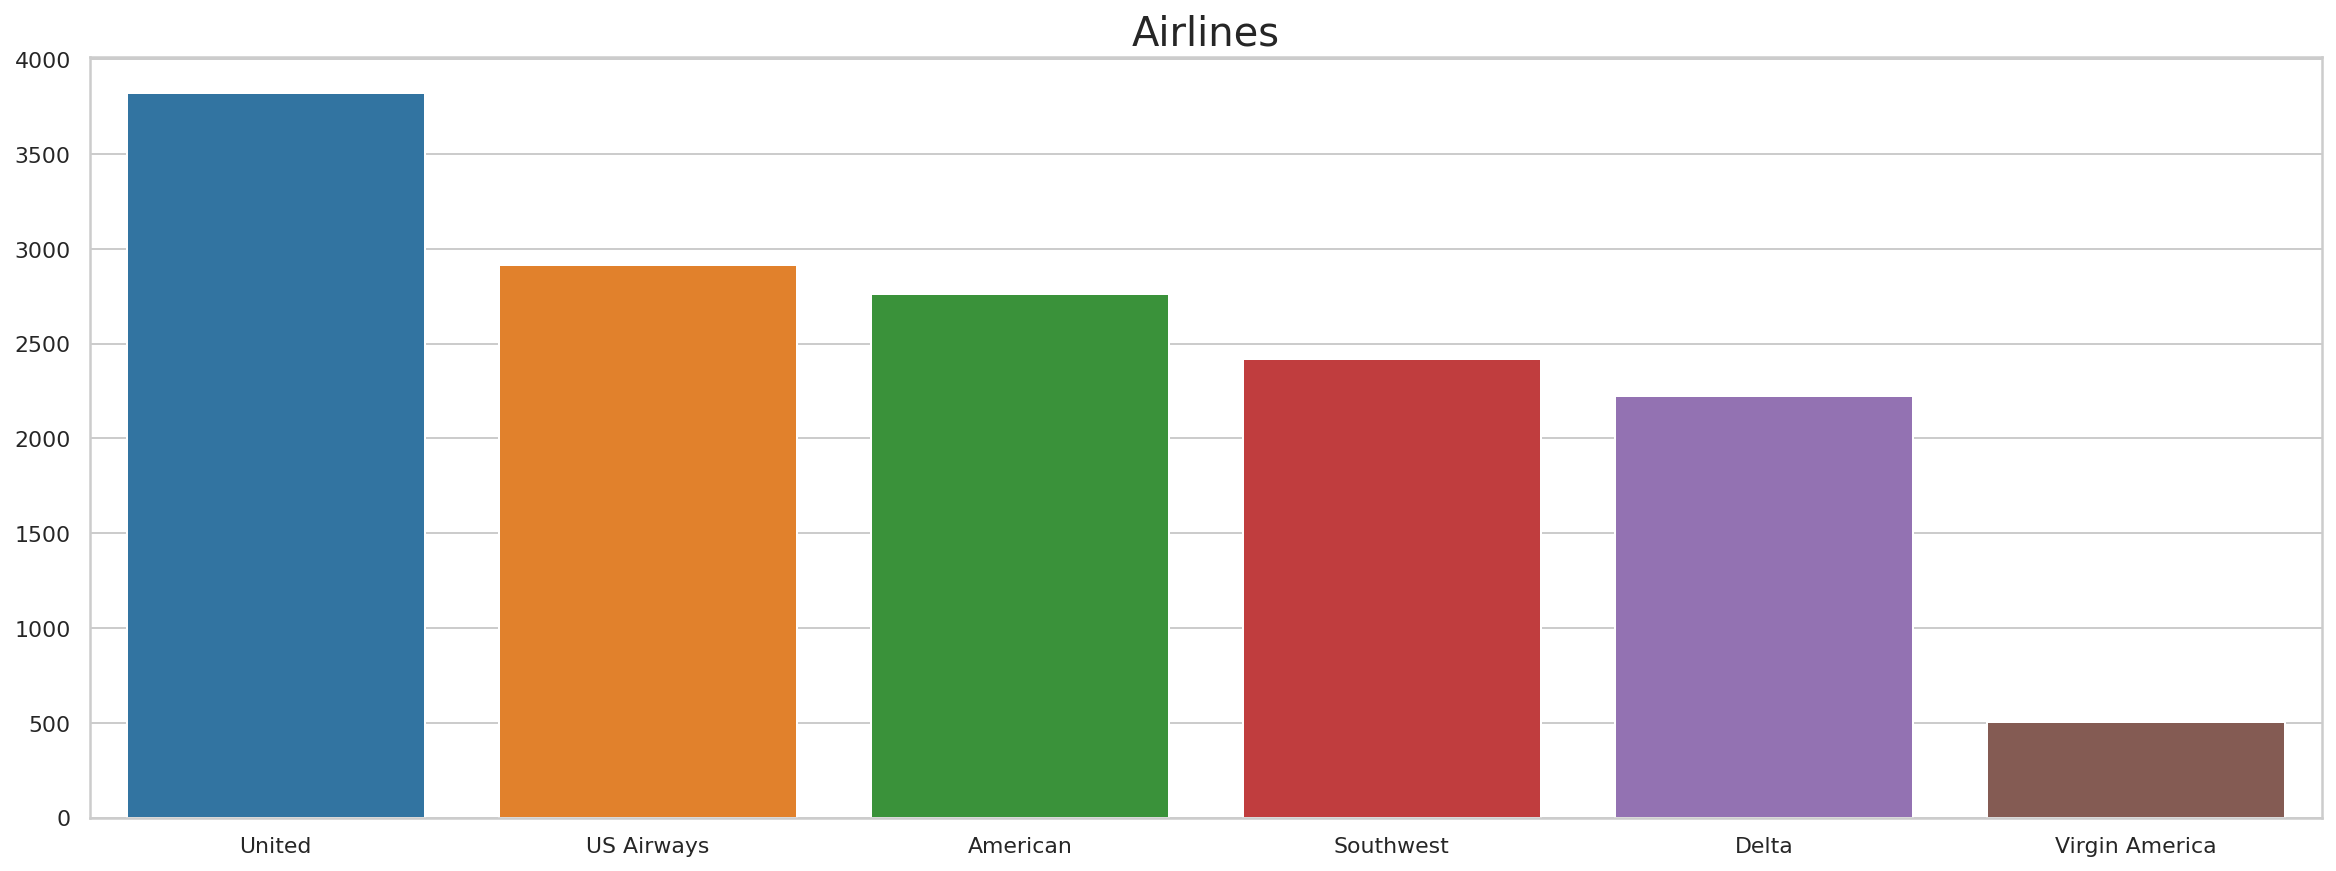

In [14]:
plt.figure(figsize=(20,7));
sns.countplot(x= df.airline, order = df.airline.value_counts().index);
plt.xlabel('');
plt.ylabel('');
plt.title('Airlines',fontsize = 20);
plt.show()

- Most of the tweets belongs to **United Airlines** and followed by US Airways , American. But we better check the sentiments of these tweets

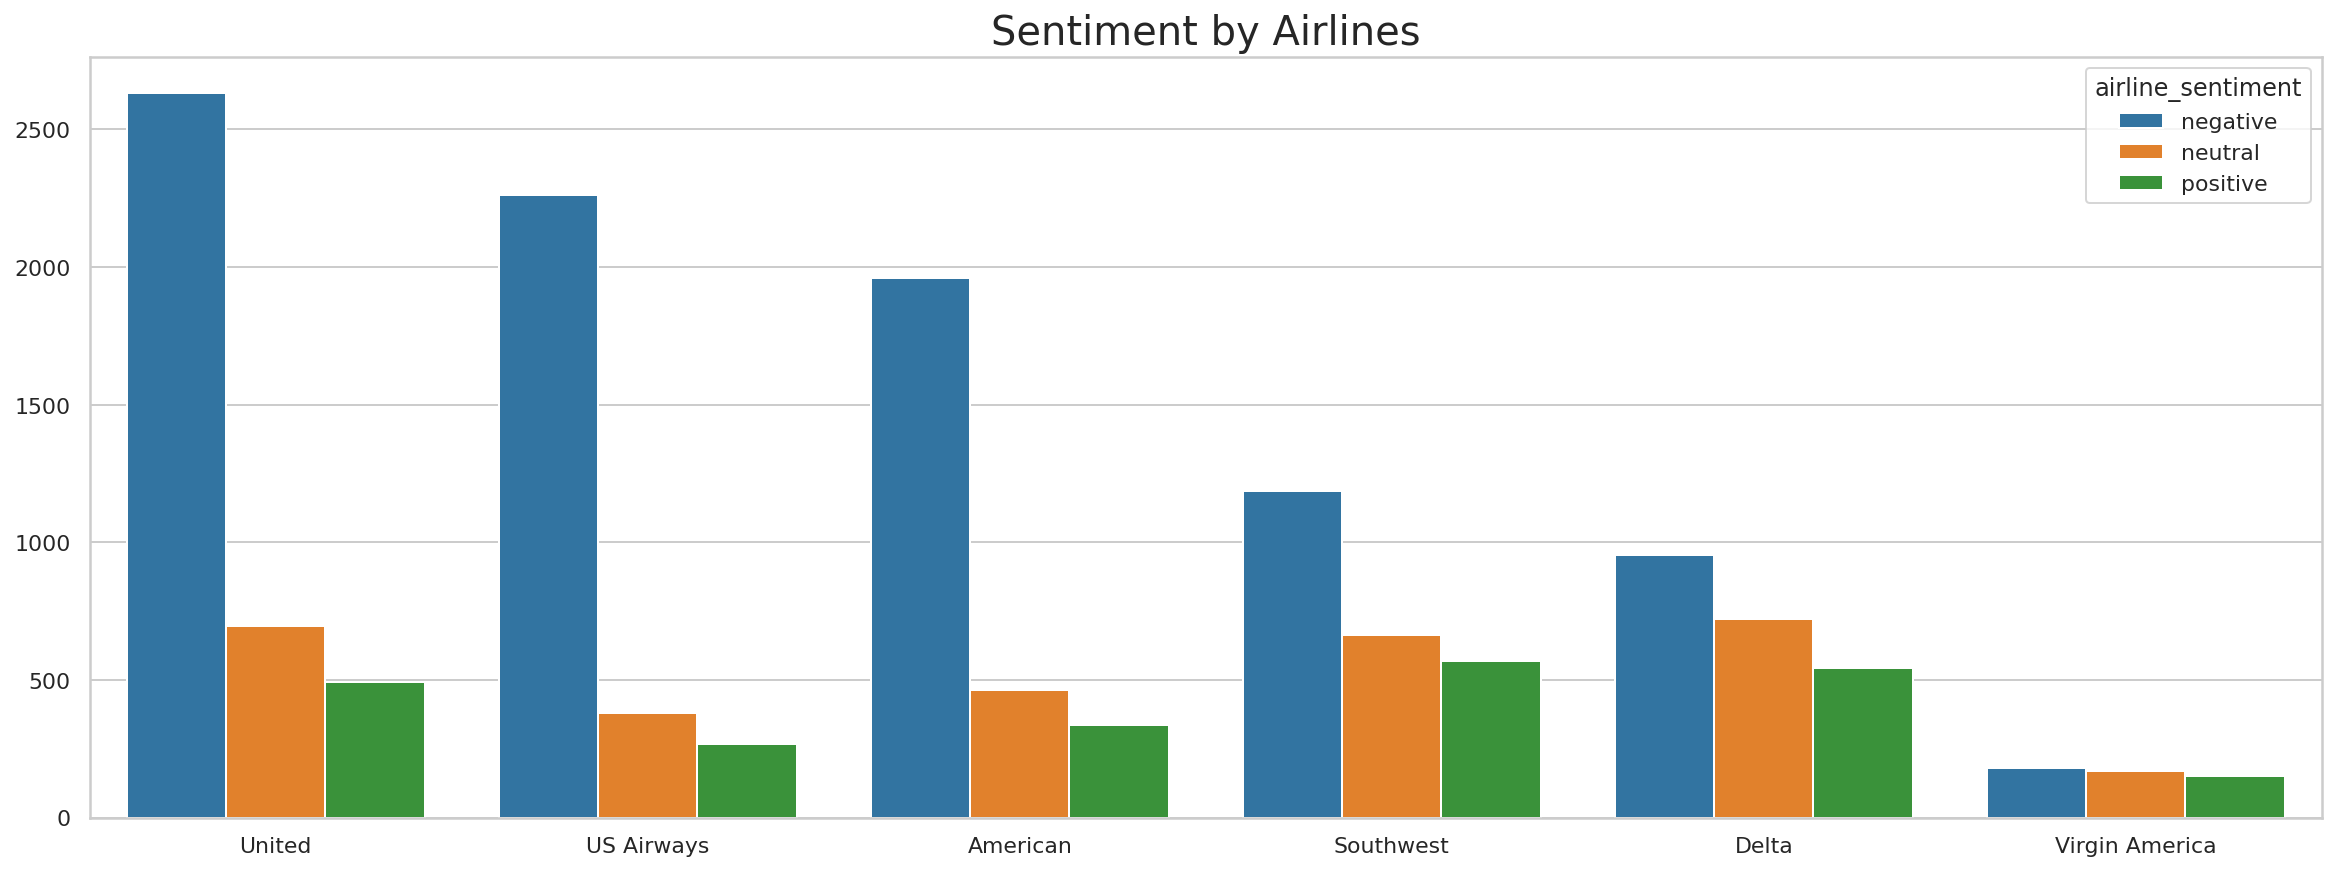

In [15]:
plt.figure(figsize=(20,7));
sns.countplot(x= df.airline , order = df.airline.value_counts().index ,hue= df.airline_sentiment ,
              hue_order = df.airline_sentiment.value_counts().index );
plt.xlabel('');
plt.ylabel('');
plt.title('Sentiment by Airlines',fontsize = 20);
plt.show()

- Looking at the number of negative sentiments, **United Airline** ranks the first, followed by **US Airways Airline** and **American Airline**. 
- The numbers of negative, neutral and positive sentiments for **Virgin America Airline** is fairly balanced. 
-In general, the number of negative sentiments is the most compared among the number of negative, neutral and positive sentiments for most of the airlines.
- But this isn't normalizing the data. We can see that Virgin America isn't really talked about all that much. So we need to consider percentage of negative tweets for all tweets

In [17]:
# Negative Sentiment by Airlines Company
grouped_tweets =df.groupby(['airline','airline_sentiment']).count().iloc[:,0]
grouped_tweets

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: tweet_id, dtype: int64

In [18]:
# Total Sentiment by Airlines Company
total_tweets =df.groupby('airline')['airline_sentiment'].count()
total_tweets

airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64

                Negative  Positive   Neutral
American        0.710402  0.121783  0.167814
Delta           0.429793  0.244824  0.325383
Southwest       0.490083  0.235537  0.274380
US Airways      0.776862  0.092345  0.130793
United          0.688906  0.128728  0.182365
Virgin America  0.359127  0.301587  0.339286


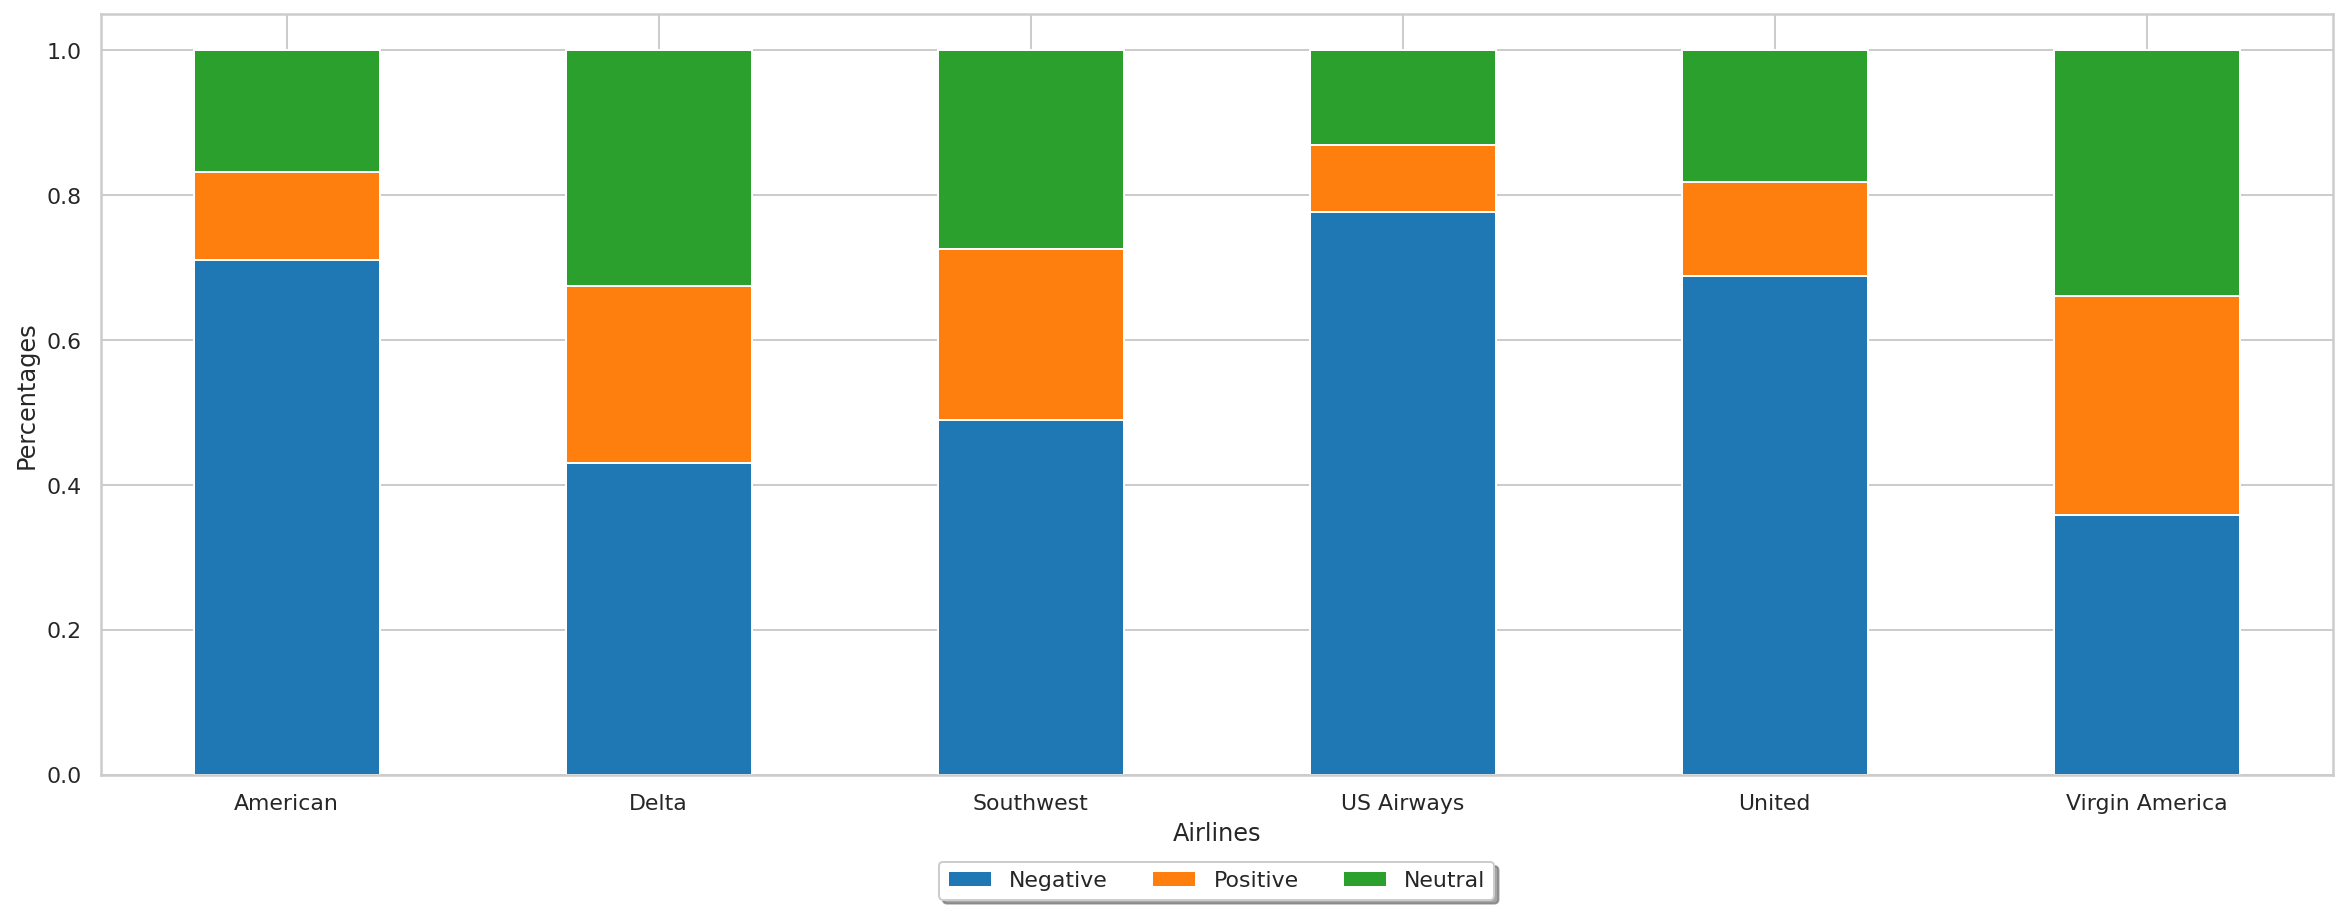

In [19]:
negative_perc = {'American':grouped_tweets[0] / total_tweets[0],
                 'Delta':grouped_tweets[3] / total_tweets[1],
                 'Southwest': grouped_tweets[6] / total_tweets[2],
                 'US Airways': grouped_tweets[9] / total_tweets[3],
                 'United': grouped_tweets[12] / total_tweets[4],
                 'Virgin America': grouped_tweets[15] / total_tweets[5]}

positive_perc = {'American':grouped_tweets[2] / total_tweets[0],
                 'Delta':grouped_tweets[5] / total_tweets[1],
                 'Southwest': grouped_tweets[8] / total_tweets[2],
                 'US Airways': grouped_tweets[11] / total_tweets[3],
                 'United': grouped_tweets[14] / total_tweets[4],
                 'Virgin America': grouped_tweets[17] / total_tweets[5]}
  
neutral_perc =  {'American':grouped_tweets[1] / total_tweets[0],
                 'Delta':grouped_tweets[4] / total_tweets[1],
                 'Southwest': grouped_tweets[7] / total_tweets[2],
                 'US Airways': grouped_tweets[10] / total_tweets[3],
                 'United': grouped_tweets[13] / total_tweets[4],
                 'Virgin America': grouped_tweets[16] / total_tweets[5]}
  

#make a dataframe from the dictionary
df_neg_perc = pd.DataFrame.from_dict(negative_perc, orient = 'index')
df_pos_perc = pd.DataFrame.from_dict(positive_perc, orient = 'index')
df_neu_perc = pd.DataFrame.from_dict(neutral_perc, orient = 'index')

#have to manually set column name when using .from_dict() method
df_neg_perc.columns = ['Negative']
df_pos_perc.columns = ['Positive']
df_neu_perc.columns = ['Neutral']

# Merge all percentage dataframes
# percentage = merge_dfs(df_neg_perc, df_pos_perc, df_neu_perc) 
df_list = [df_neg_perc, df_pos_perc, df_neu_perc]
percentage =pd.concat(df_list, axis = 1)
print(percentage)

#graph all of our data
ax = percentage.plot(kind = 'bar', stacked = True, rot = 0, figsize = (20,7))
#set x label
ax.set_xlabel('Airlines')
#set y label
ax.set_ylabel('Percentages')
#move the legend to the bottom of the graph since it wants to sit over all of our data and block it - stupid legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)

plt.show()

 - Finally we have good looking visualization of airlines sentiment, when we normalized sentiments something changed, We can see that even though **United** had the most negative tweets from initial anlaysis, they made up  **68%** of all their tweets. And **US Airways** and **American** had higher negative percentages at **77%** and **71%** respectively.

- It looks like **Virgin America** has highest percentage positive tweets.

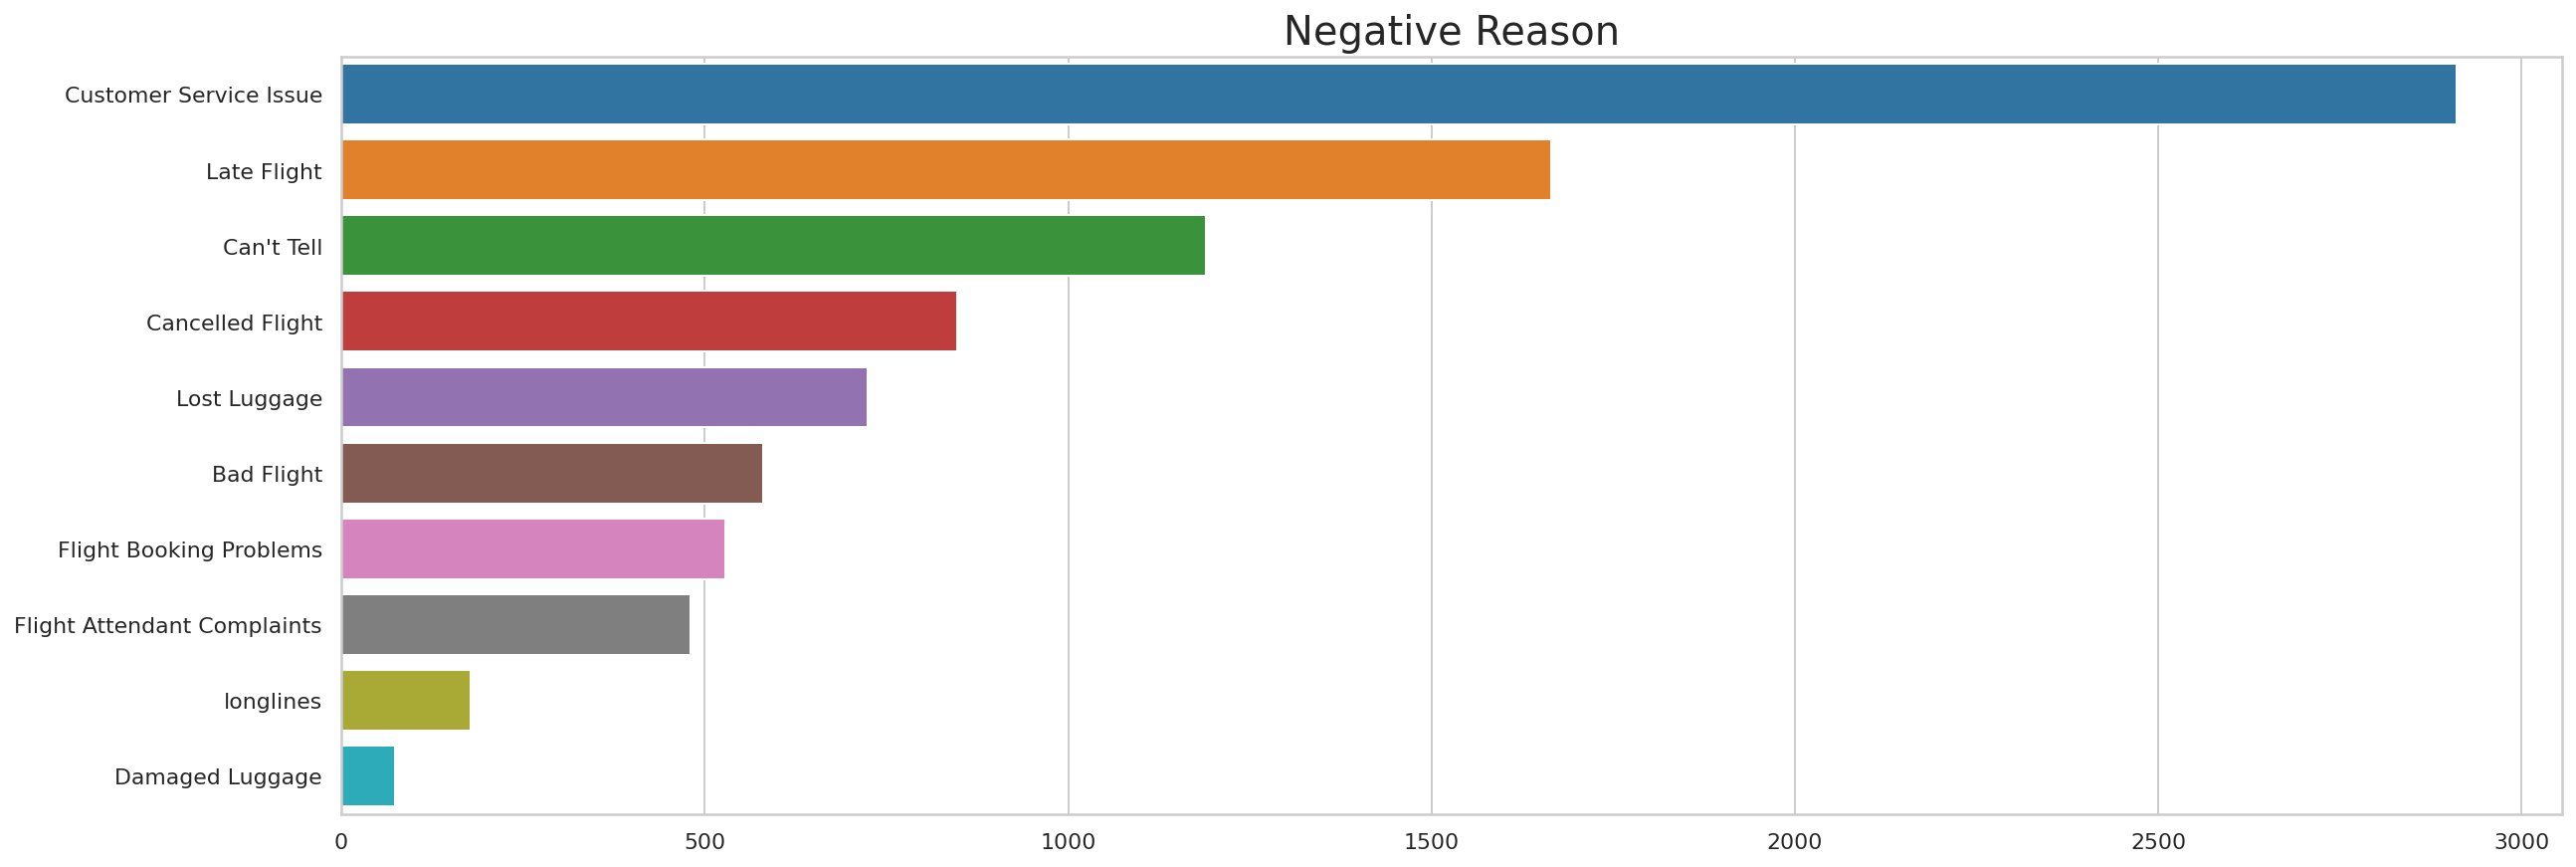

In [20]:
plt.figure(figsize=(20,7));
sns.countplot(y= df.negativereason , order = df.negativereason.value_counts().index);
plt.xlabel('');
plt.ylabel('');
plt.title('Negative Reason',fontsize = 20);
plt.show()

- Most of the customers complaning about **Customer Service**
- Another big reason they state negative reason is **late flights**.
- Over 1000 people preffer to not state what was the reason
- Now, Let's go detail and see negative reasons by the airlines

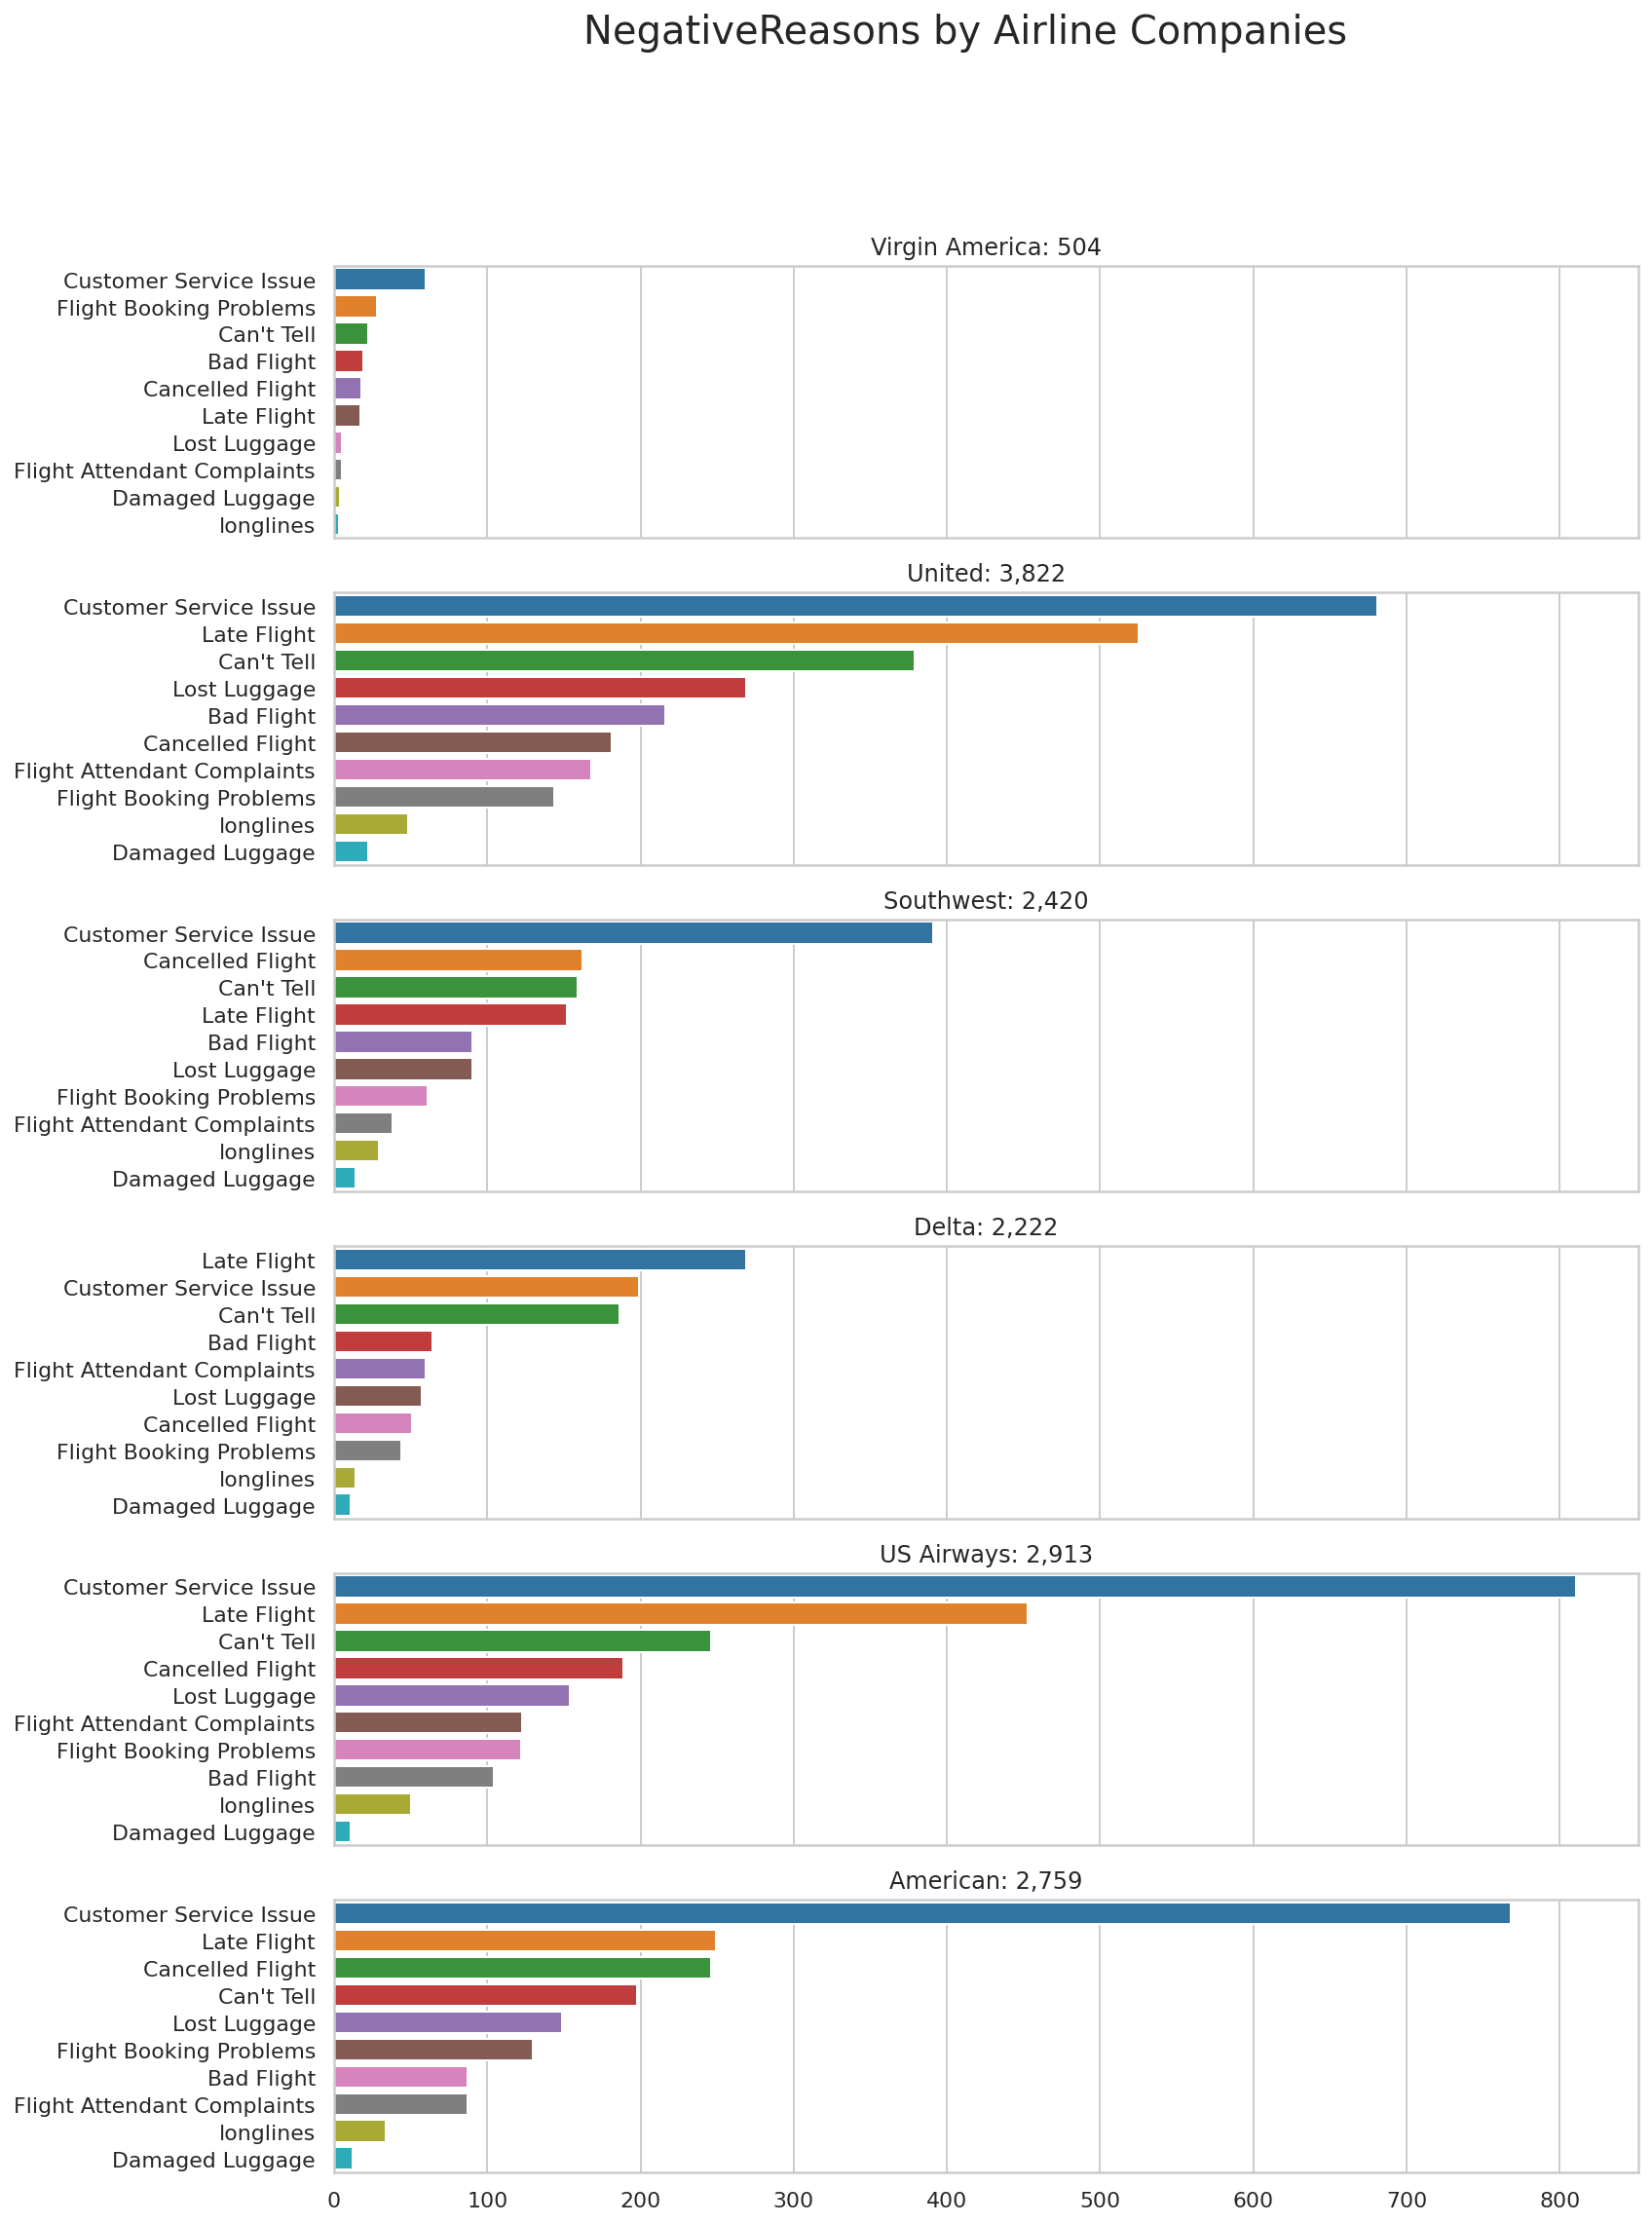

In [21]:
# Negative reasons per airline companies.
fig, axes = plt.subplots(6,1, figsize=(12,18), sharex=True)
axes = axes.flatten()
airlines = df['airline'].unique()

for airline, ax in zip(airlines, axes.flatten()):
    ax = sns.countplot(data = df[df.airline==airline], y = 'negativereason',
                       order = df[df.airline==airline].negativereason.value_counts().index,
                       hue_order =df.negativereason.value_counts().index,ax = ax)
    ax.set_title(f"{airline}: {format(len(df[df.airline==airline]),',')}")
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.suptitle("NegativeReasons by Airline Companies", fontsize = 20)
plt.show()


- Most of the passengers give negative reviews because they do not satisfy to the quality of **customer services**.
- Second major unsatisfaction is bad experience in the **flights’ delay** 
- And other negative reason provided by the airlines without providing any solid reason. 
- The issue of **damaged luggage** is the least

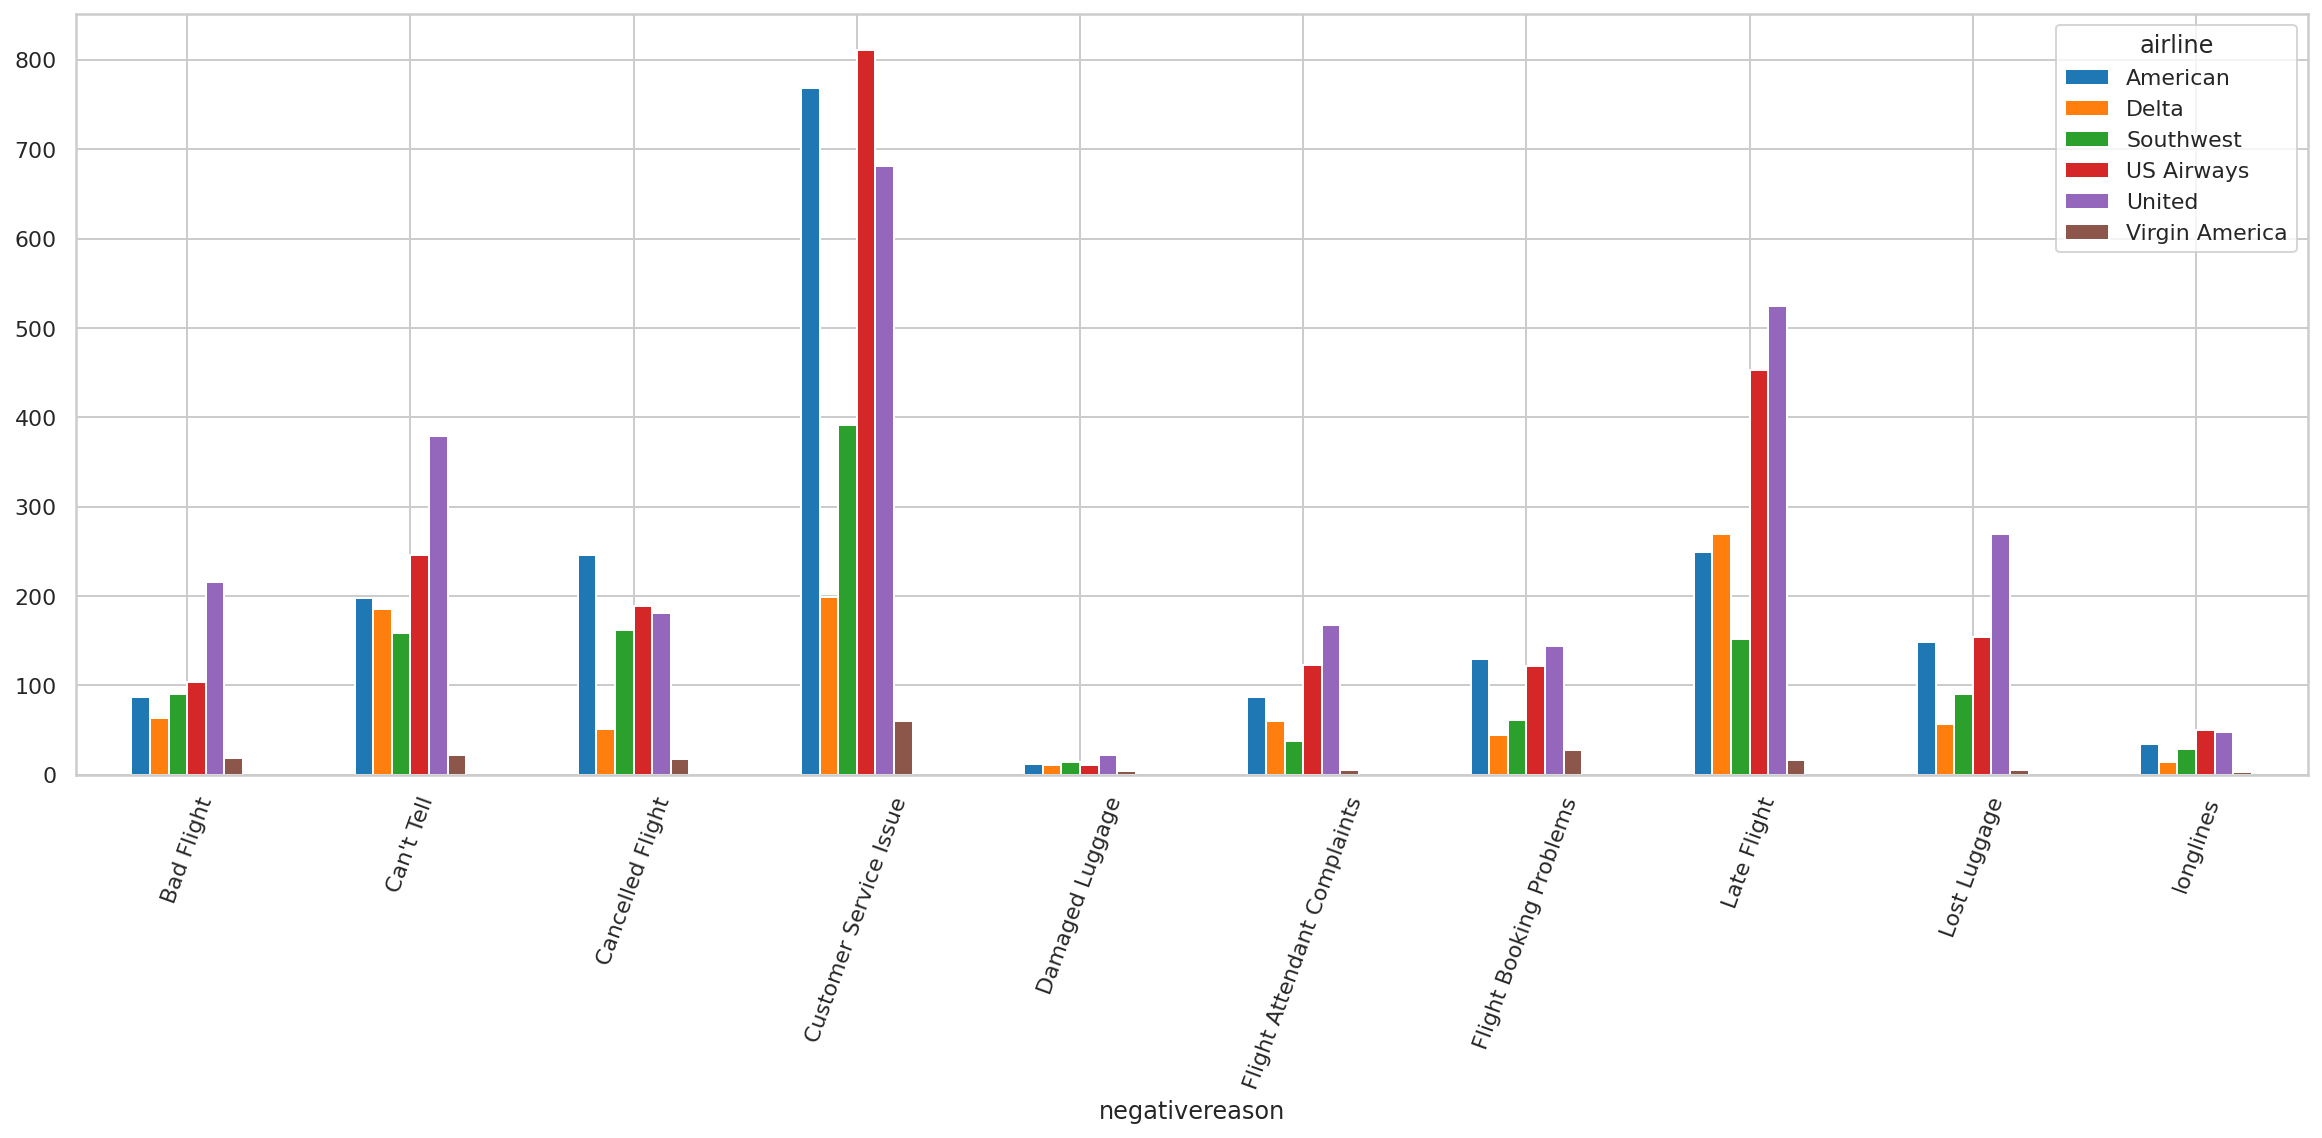

In [23]:
#function that reduces the dataframe to only the airline and the negative reasons, then extract the reasons and the frequency
#each reason was referenced to an airline
def reason(df):
    df = df.reset_index().loc[:,['airline','negativereason']].dropna().groupby(['airline','negativereason']).size()
    return df

#call the function and plot the results
ax = reason(df).unstack(0).plot(kind = 'bar', figsize = (20,7), rot = 70)

plt.show()